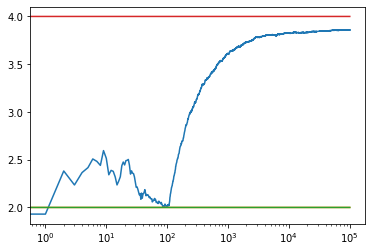

1.99385360542639
1.9923709477184783
3.993559335916055


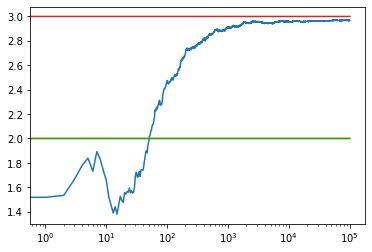

2.0160583526587077
2.0489733093173057
2.9994687861841327


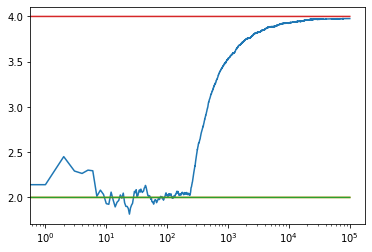

2.011088760706741
1.9849730591991046
3.9946548241688933


In [14]:
#epsilon greedy action selection
#Epsilon-Greedy is a simple method to balance exploration and exploitation by choosing between exploration and exploitation randomly.
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
  
# Define Action class
class Actions:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0
  
  # Choose a random action
  def choose(self): 
    return np.random.randn() + self.m
  
  # Update the action-value estimate
  def update(self, x):
    self.N += 2
    self.mean = (1 - 2.0 / self.N)*self.mean + 2.0 / self.N * x
  
  
def run_experiment(m1, m2, m3, eps, N):
      
  actions = [Actions(m1), Actions(m2), Actions(m3)]
  
  data = np.empty(N)
    
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([a.mean for a in actions])
    x = actions[j].choose()
    actions[j].update(x)
  
    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  
  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()
  
  for a in actions:
    print(a.mean)
  
  return cumulative_average
  
  
if __name__ == '__main__':
      
  c_1 = run_experiment(2.0, 2.0, 4.0, 0.1, 100000)
  c_05 = run_experiment(2.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(2.0, 2.0, 4.0, 0.01, 100000)

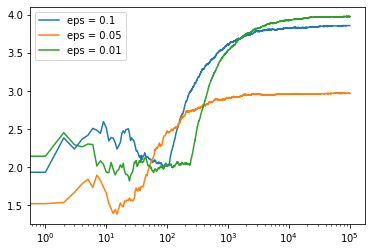

In [15]:
# log scale plot
plt.plot(c_1, label ='eps = 0.1')
plt.plot(c_05, label ='eps = 0.05')
plt.plot(c_01, label ='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

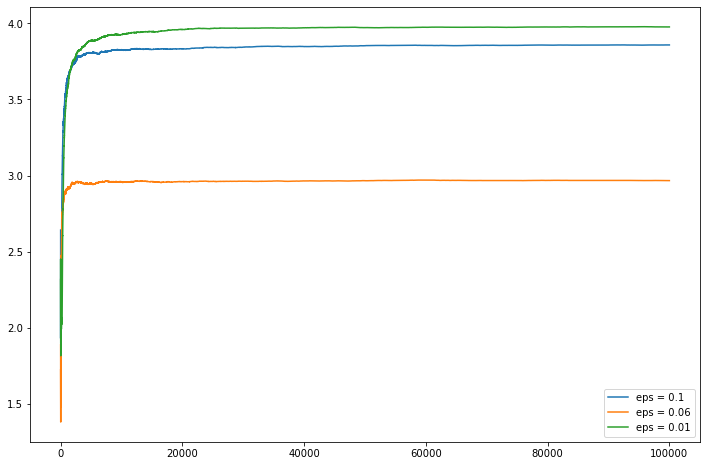

In [16]:
# linear plot
plt.figure(figsize = (12, 8))
plt.plot(c_1, label ='eps = 0.1')
plt.plot(c_05, label ='eps = 0.06')
plt.plot(c_01, label ='eps = 0.01')
plt.legend()
plt.show()
